# Tempo de execução com uso de laço e com operação matricial no Matlab, incluindo um terceiro roteador a 50% da dimensão vertical e a 80% da dimensão horizontal

In [8]:
clear all;clc;close all;
dPasso = 5;                          % Resolução do grid
dDim = 200;                          % Dimensão do grid
nl = (dDim-2*dPasso)/dPasso + 1;     % Número de pontos de medição

In [18]:
%% Código sem Laço
t2 = tic;                            % Abre um contador de tempo identificado por t2
% Matriz com posição de cada ponto do grid (posição relativa ao canto inferior direito)
[px,py] = meshgrid(dPasso:dPasso:dDim-dPasso, dPasso:dPasso:dDim-dPasso);
% Matrizes com posição de cada ponto do grid relativa a cada BS (roteador);
% em caso de duvida, ver exemplo na pag da mathworks
% (https://www.mathworks.com/help/matlab/ref/meshgrid.html)
pbs0SF = px + j*py - ( dDim/2 + 0.8*dDim*j);
pbs1SF = px + j*py - ( dDim/2 + 0.2*dDim*j);
pbs2SF = px + j*py - ( 0.8*dDim + j*dDim/2);
% Cálculo da potência recebida em cada roteador
pl0SF = 10*log10(1./(abs(pbs0SF).^4)/1e-3);
pl1SF = 10*log10(1./(abs(pbs1SF).^4)/1e-3);
pl2SF = 10*log10(1./(abs(pbs2SF).^4)/1e-3);
% Cálculo da melhor potência e cada ponto do grid
%plfSF = max([pl0SF(:);pl1SF(:);pl2SF(:)]);
plfSF= max(pl0SF,pl1SF);
plfSF = max (plfSF,pl2SF);
tempoSemFor = toc(t2); % fecha contador de tempo e guarda tempo na variável tempoComFor

## Motra tempo de execucação do código  e Plota as posiçoes dos pontos do grid para os três roteadores

Tempo sem Laço FOR = 0.001381


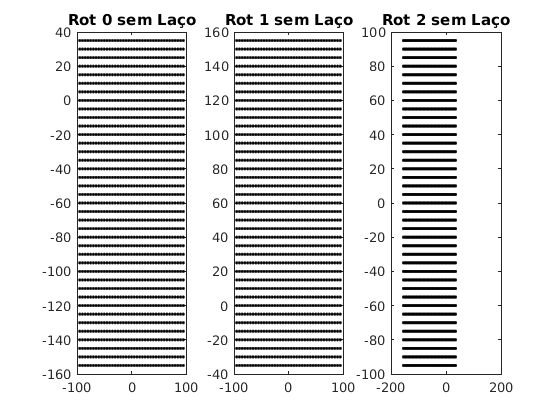

In [19]:
disp(['Tempo sem Laço FOR = ' num2str(tempoSemFor)]); % Mostra tempo de execuçao do código
%% Gráficos para código com e sem laços for
subplot(1,3,1); plot(pbs0SF,'k.');title('Rot 0 sem Laço');
subplot(1,3,2); plot(pbs1SF,'k.');title('Rot 1 sem Laço');
subplot(1,3,3); plot(pbs2SF,'k.');title('Rot 2 sem Laço');


## Plota a mapa de cores relativo a potência para os três roteadores separadamente

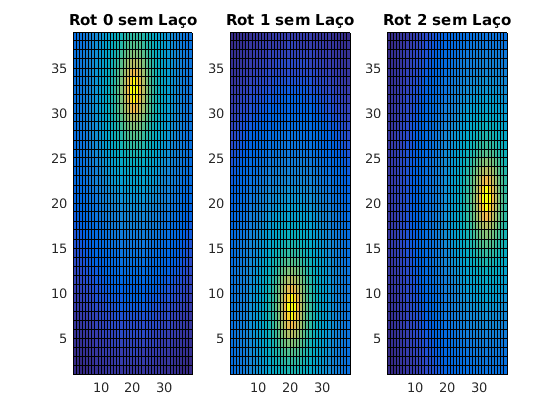

In [20]:

subplot(1,3,1); pcolor(pl0SF);title('Rot 0 sem Laço');
subplot(1,3,2); pcolor(pl1SF);title('Rot 1 sem Laço');
subplot(1,3,3); pcolor(pl2SF);title('Rot 2 sem Laço');

## Plota a mapa de cores relativo a melhor potência em cada ponto do grid (melhor entre os três roteadores)

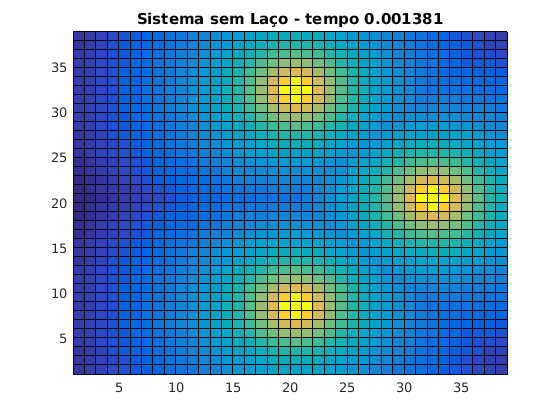

In [21]:

pcolor(plfSF);title(['Sistema sem Laço - tempo ' num2str(tempoSemFor)]);